## TensorFlow Keras Layers

2020.9.12

### Reference

https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import matplotlib.pyplot as plt

## Import the MNIST dataset

In [74]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, -1)

In [75]:
print(f"train_images.shape:{train_images.shape}")
print(f"train_labels.shape:{train_labels.shape}")

train_images.shape:(60000, 28, 28, 1)
train_labels.shape:(60000,)


## tf.keras.Conv{x}D layers

卷积系列层

In [76]:

input_shape = train_images.shape[1:] # (28, 28, 1)
# make single sample x to form a batch, by expanding dimention
x = np.expand_dims(train_images[0], 0).astype('float32') # uint8 to float32
print(x.shape)
print(x.dtype)
m = tf.keras.layers.Conv2D(1, kernel_size=1, input_shape=input_shape)
y = m(x)
print(y.shape)
print(y.dtype)

(1, 28, 28, 1)
float32
(1, 28, 28, 1)
<dtype: 'float32'>


In [77]:
print(np.max(x))
print(np.min(x))
print(np.max(y))
print(np.min(y))

255.0
0.0
86.01744
0.0


In [78]:
m.kernel

<tf.Variable 'conv2d_3/kernel:0' shape=(1, 1, 1, 1) dtype=float32, numpy=array([[[[0.3373233]]]], dtype=float32)>

In [79]:
x0 = x[0,:,:,0]
x0.shape
# print(x0)

(28, 28)

(1, 28, 28, 1)


Text(0.5, 1.0, 'image after 1x1 kernel convolution')

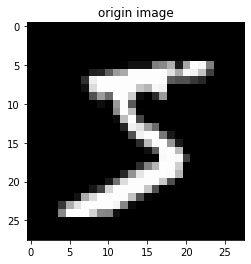

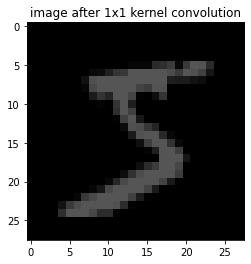

In [80]:
print(x.shape)
plt.figure()
plt.imshow(x[0,:,:,0], vmin=0, vmax=255, cmap="gray")
plt.title("origin image")
plt.figure()
plt.imshow(y[0,:,:,0], vmin=0, vmax=255, cmap="gray")
plt.title("image after 1x1 kernel convolution")

## tf.keras.Conv2Dx layers

Pooling 系列层

### tf.keras.layers.AveragePooling2D

In [81]:
input_shape =  (2, 4, 5, 3) # (2, 4, 5, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.AveragePooling2D(pool_size=(3, 3))(x)

In [82]:
y.shape

TensorShape([2, 1, 1, 3])

### tf.keras.layers.GlobalAveragePooling2D

In [83]:
m = tf.keras.layers.GlobalAveragePooling2D()
y = m(x)

In [84]:
np.average(x)

0.09790755

In [85]:
print(x[0].shape)
print(y)

(4, 5, 3)
tf.Tensor(
[[-0.07688762  0.08782906  0.00267959]
 [ 0.35513687  0.16726175  0.05142561]], shape=(2, 3), dtype=float32)


## tf.pad

In [86]:
# t = tf.constant([[1, 2, 3], [4, 5, 6]])
t = np.asarray([[1,2,3],[4,5,6]])
paddings = tf.constant([[1, 1],[1, 1]])
# 'constant_values' is 0.
# rank of 't' is 2.
tf.pad(t, paddings, "CONSTANT")

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0],
       [0, 4, 5, 6, 0],
       [0, 0, 0, 0, 0]])>

In [87]:
t

array([[1, 2, 3],
       [4, 5, 6]])